In [57]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view


In [58]:
# input the mp id and the API key
MP_id = "mp-867193"
API = "aEF0VdAXhHPNJOkG"

# defining the material object
mpr = MPRester(API)

## Collecte des données

In [59]:
structure = mpr.get_structure_by_material_id(MP_id)
analyzer = SpacegroupAnalyzer(structure)

# Symétries choisies
liste_symetrie = analyzer.get_symmetry_operations()

sym1 = liste_symetrie[2]
sym2 = liste_symetrie[4]
sym3 = liste_symetrie[6]

#Coordonnées des atomes
liste_coordonnees = analyzer.get_conventional_standard_structure()

coord_Sr = liste_coordonnees[0].frac_coords
coord_Bi = liste_coordonnees[9].frac_coords
coord_Au = liste_coordonnees[12].frac_coords


## Etude de l’effet de 3 éléments de symétrie différents sur différents atomes

### Première symétrie sur un atome de Sr

In [61]:
print("matrice de rotation de la première symétrie :\n", sym1.rotation_matrix, "\n")
print("élément de symétrie : \n", sym1.as_xyz_string(), "\n")
print("coordonnées initiales de l'atome de Sr dans la maille : \n", liste_coordonnees[0].frac_coords, "\n")
print("coordonnées après la rotation : \n", sym1.operate(coord_Sr))

matrice de rotation de la première symétrie :
 [[ 1.  1.  1.]
 [ 0.  0. -1.]
 [-1.  0.  0.]] 

élément de symétrie : 
 x+y+z, -z, -x 

coordonnées initiales de l'atome de Sr dans la maille : 
 [0.25 0.75 0.75] 

coordonnées après la rotation : 
 [ 1.75 -0.75 -0.25]


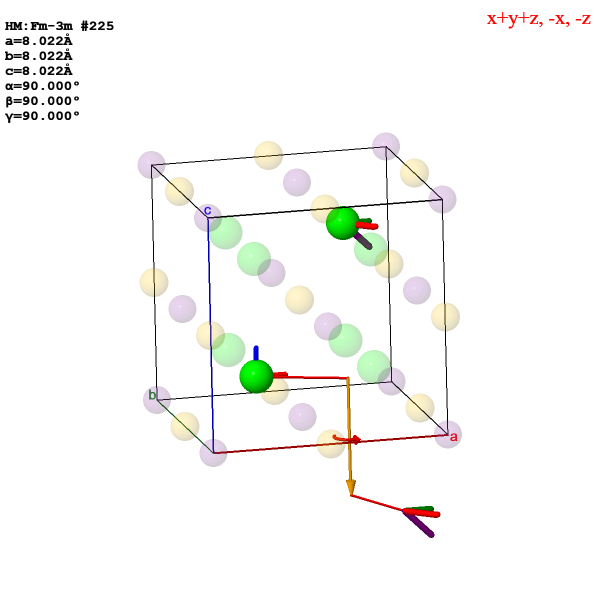

### Deuxième symétrie sur un atome de Bi

In [43]:
print("matrice de rotation de la deuxième symétrie :\n", liste_symetrie[4].rotation_matrix, "\n")
print("élément de symétrie : \n", sym2.as_xyz_string(), "\n")
print("coordonnées initiales de l'atome de Bi dans la maille : \n", liste_coordonnees[9].frac_coords, "\n")
print("coordonnées après la rotation : \n", sym2.operate(coord_Bi))


matrice de rotation de la deuxième symétrie :
 [[ 0.  1.  0.]
 [ 1.  0.  0.]
 [-1. -1. -1.]] 

élément de symétrie : 
 y, x, -x-y-z 

coordonnées initiales de l'atome de Bi dans la maille : 
 [0.  0.5 0.5] 

coordonnées après la rotation : 
 [ 0.5  0.  -1. ]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

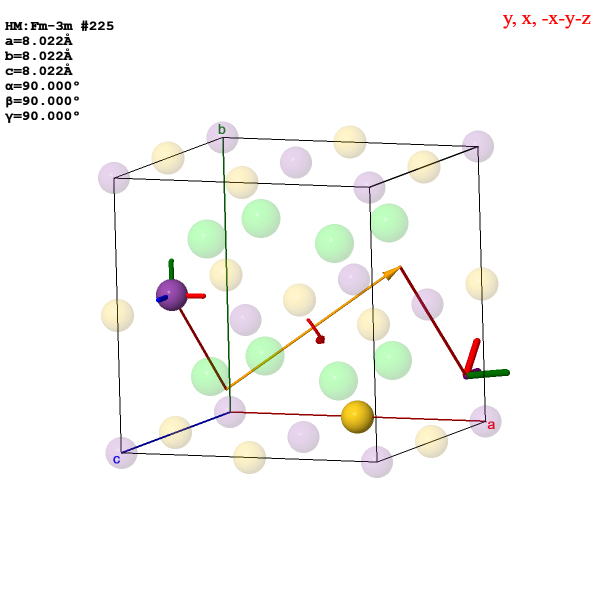

### Troisième symétrie sur un atome d'Au

In [63]:
print("matrice de rotation de la troisième symétrie :\n", liste_symetrie[6].rotation_matrix, "\n")
print("élément de symétrie : \n", sym3.as_xyz_string(), "\n")
print("coordonnées initiales de l'atome de Au dans la maille : \n", liste_coordonnees[12].frac_coords, "\n")
print("coordonnées après la rotation : \n", sym3.operate(coord_Au)) 


matrice de rotation de la troisième symétrie :
 [[ 0.  0. -1.]
 [ 1.  1.  1.]
 [ 0. -1.  0.]] 

élément de symétrie : 
 -z, x+y+z, -y 

coordonnées initiales de l'atome de Au dans la maille : 
 [0.5 0.  0. ] 

coordonnées après la rotation : 
 [0.  0.5 0. ]


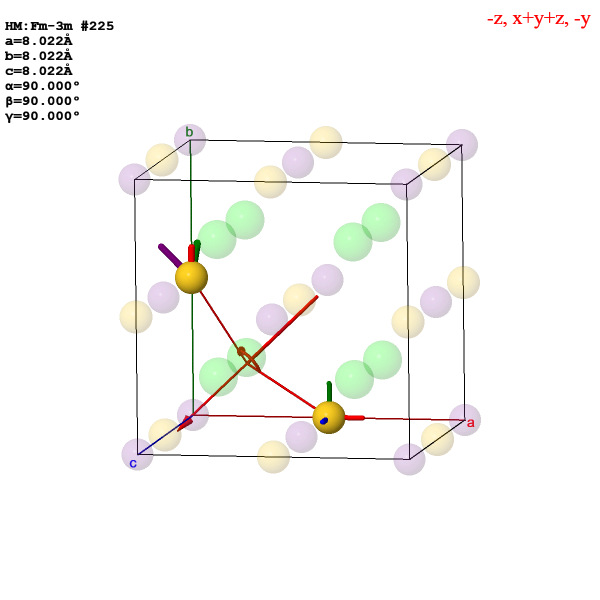

Remarque : 
- quick_view de jsmol n'affichait rien chez moi, je ne pouvais donc pas voir si mon code était bon (affichait la bonne "image"). J'ai donc dû trouver une autre solution. Soyez indulgent :)
- aucune des symétries choisies n'a de translation donc je n'ai pas mis les vecteurs nuls correspondant